In [1]:
# Sample code to use matplotlib to plot the track of an
# Atlantic Hurricane

,rownames,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [4]:
!pip install  basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
s = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv")
s.head()

,rownames,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [2]:
charley = s.query("name == 'Charley' & year == 2004")
charley.head()

,rownames,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
9501,9502,Charley,2004,8,9,12,11.4,-59.2,tropical depression,NaN,30,1010,0.0,0.0
9502,9503,Charley,2004,8,9,18,11.7,-61.1,tropical depression,NaN,30,1009,0.0,0.0
9503,9504,Charley,2004,8,10,0,12.2,-63.2,tropical depression,NaN,30,1009,0.0,0.0
9504,9505,Charley,2004,8,10,6,12.9,-65.3,tropical storm,NaN,35,1007,75.0,0.0
9505,9506,Charley,2004,8,10,12,13.8,-67.6,tropical storm,NaN,40,1004,125.0,0.0


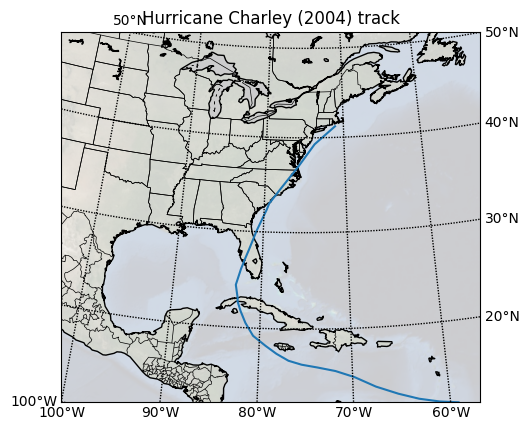

In [3]:
# https://pythonprogramming.net/plotting-maps-python-basemap/
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
def drawmap():

# some trial-and-error was needed to get a good projection
# for the North Atlantic
    m = Basemap(projection='aea', lat_0=25, lon_0 = -75,resolution='l',
                llcrnrlat=10,urcrnrlat=50,
                llcrnrlon=-100,urcrnrlon=-50)

    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

# This is the syntax to convert using the projection
# from long, lat to map coordinates
    x,y =     m(charley.long, charley.lat,)
# And this hurricane track is just an x,y scatterplot
    m.plot(x,y)
# This decorates the map with a color background image of Earth
    m.bluemarble(alpha=0.2)
    parallels = np.arange(0.,60,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(-20.,-140.,-10.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    plt.title("Hurricane Charley (2004) track")
    plt.show()
drawmap()